In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import subprocess
import xml.etree.ElementTree as ET
import os
%matplotlib inline

# inf data

In [2]:
data_naqm = pd.read_csv("results_naqm_zc.csv")
data_aqm = pd.read_csv("results_aqm_zc.csv")
data_naqm_10 = data_naqm[:10]
data_aqm_10 = data_aqm[:10]
data_naqm_11 = data_naqm[10:]
data_aqm_11 = data_aqm[10:]

In [3]:
data_naqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),Flow Completion Time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Qeueing Delay(ms)
0,0,69713,200,0.395283,0.809576,498.204248,403.296584,199.299359,0.001370,0.112559
1,1,56629,200,0.386983,0.809506,497.043656,402.222166,199.601338,0.001342,0.112988
2,2,86799,200,0.386274,0.809068,497.821187,402.673602,200.251977,0.001368,0.112227
3,3,42653,200,0.392096,0.809243,498.174921,403.071194,199.931169,0.001394,0.111719
4,4,82842,200,0.389707,0.809370,497.034779,402.206597,199.817671,0.001403,0.111738
5,5,72958,200,0.394009,0.809558,497.972818,403.071627,200.138592,0.001401,0.111726
6,6,23256,200,0.385185,0.809554,498.104274,403.019238,200.484799,0.001352,0.112933
7,7,14590,200,0.393086,0.809441,497.147078,402.388653,199.562852,0.001360,0.112702
8,8,98472,200,0.391850,0.809397,498.111710,403.127166,199.404489,0.001368,0.112556
9,9,8288,200,0.390917,0.809507,497.138305,402.361423,200.709691,0.001388,0.111875


In [4]:
data_aqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),Flow Completion Time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Qeueing Delay(ms)
0,0,69713,200,0.652118,0.794904,498.230031,396.012230,199.208966,0.002225,0.022166
1,1,56629,200,0.649242,0.794148,497.105156,394.747817,199.510664,0.002241,0.022314
2,2,86799,200,0.648344,0.793761,497.916945,395.189278,200.162512,0.002256,0.022762
3,3,42653,200,0.641759,0.793010,498.100055,394.963143,199.841969,0.002231,0.022519
4,4,82842,200,0.650352,0.793780,497.051654,394.525356,199.726227,0.002058,0.020294
5,5,72958,200,0.645251,0.795007,498.014668,395.892448,200.049256,0.002229,0.022390
6,6,23256,200,0.649066,0.793578,498.129240,395.273855,200.394294,0.002240,0.022427
7,7,14590,200,0.646454,0.794017,497.152103,394.716487,199.472197,0.002209,0.022047
8,8,98472,200,0.648226,0.793246,498.180344,395.163198,199.314118,0.002230,0.022185
9,9,8288,200,0.643474,0.793653,497.136172,394.497205,200.619586,0.002184,0.021769


### Average Throghput 

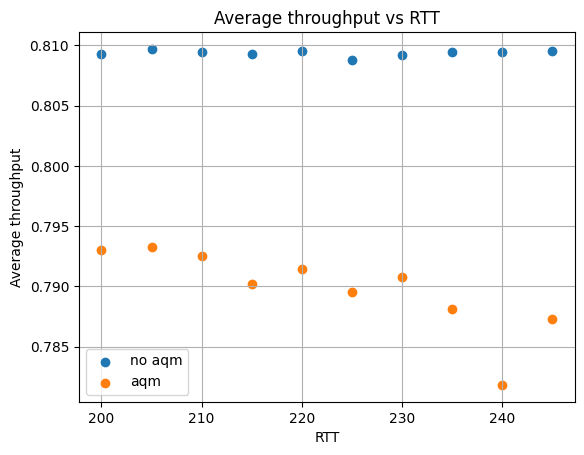

In [5]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Average Throughput(Mbps)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Average Throughput(Mbps)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Average throughput")
plt.title("Average throughput vs RTT")
plt.grid()
plt.legend()

### Effective RTT

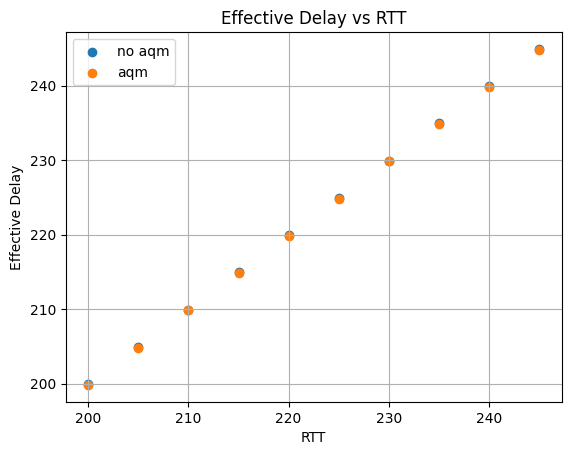

In [6]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Effective Delay(ms)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Effective Delay(ms)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Effective Delay")
plt.title("Effective Delay vs RTT")
plt.grid()
plt.legend()

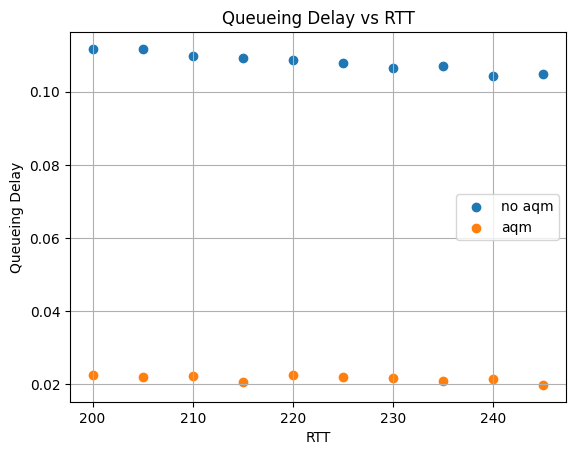

In [7]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Qeueing Delay(ms)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Qeueing Delay(ms)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Queueing Delay")
plt.title("Queueing Delay vs RTT")
plt.grid()
plt.legend()

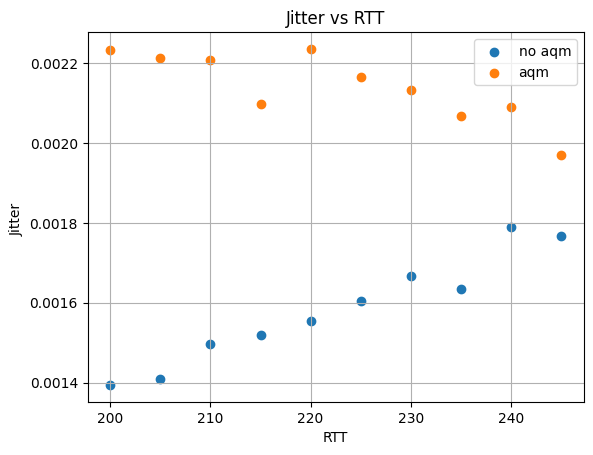

In [8]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Jitter in RTT(ms)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Jitter in RTT(ms)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Jitter ")
plt.title("Jitter vs RTT")
plt.grid()
plt.legend()

# 100 MB

In [2]:
data_naqm = pd.read_csv("results_naqm_zc_100MB.csv")
data_aqm = pd.read_csv("results_aqm_zc_100MB.csv")
data_naqm_10 = data_naqm[:10]
data_aqm_10 = data_aqm[:10]
data_naqm_11 = data_naqm[10:]
data_aqm_11 = data_aqm[10:]

In [3]:
data_naqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),Flow Completion Time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Qeueing Delay(ms)
0,0,69713,200,0.196422,0.816532,523.588798,427.185555,199.243992,0.003834,0.057192
1,1,56629,200,0.192387,0.818762,522.400522,427.219663,199.545649,0.003873,0.057299
2,2,86799,200,0.189652,0.817534,522.904645,427.086935,200.197311,0.003865,0.057561
3,3,42653,200,0.193255,0.818090,522.653730,427.087169,199.876302,0.003823,0.056852
4,4,82842,200,0.192721,0.819752,522.019437,427.171174,199.761664,0.003802,0.055731
5,5,72958,200,0.194832,0.818324,522.632609,427.145861,200.082811,0.003787,0.055944
6,6,23256,200,0.191743,0.817623,523.083065,427.171673,200.428960,0.003868,0.057093
7,7,14590,200,0.193226,0.819253,522.278861,427.207911,199.506707,0.003860,0.056557
8,8,98472,200,0.194178,0.817788,522.867394,427.177739,199.348949,0.003821,0.057016
9,9,8288,200,0.192777,0.818456,522.650447,427.220667,200.654274,0.003809,0.056457


In [4]:
data_aqm

,Simulation_number,Random Seed,RTT,Global Sync Value,Average Throughput(Mbps),Flow Completion Time(s),Averate Data Sent(Mb),Effective Delay(ms),Jitter in RTT(ms),Qeueing Delay(ms)
0,0,69713,200,0.318339,0.809688,527.847665,426.366091,199.197809,0.001222,0.011009
1,1,56629,200,0.318463,0.807849,529.051189,426.379682,199.499417,0.001231,0.011067
2,2,86799,200,0.318946,0.808136,528.707195,426.299345,200.151054,0.001244,0.011304
3,3,42653,200,0.309628,0.810826,528.211713,426.524003,199.830629,0.001230,0.011179
4,4,82842,200,0.323607,0.806217,529.851945,426.244533,199.716005,0.001119,0.010071
5,5,72958,200,0.315104,0.809208,528.351534,426.401500,200.037975,0.001226,0.011109
6,6,23256,200,0.317806,0.809475,528.722274,426.404197,200.383016,0.001234,0.011149
7,7,14590,200,0.314903,0.809614,528.477136,426.538183,199.461084,0.001212,0.010934
8,8,98472,200,0.318868,0.808466,528.959019,426.418749,199.302955,0.001225,0.011022
9,9,8288,200,0.311466,0.810842,528.050138,426.578041,200.608611,0.001197,0.010794


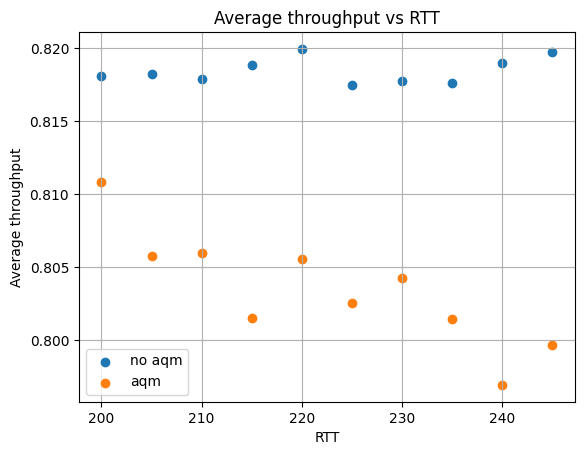

In [5]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Average Throughput(Mbps)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Average Throughput(Mbps)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Average throughput")
plt.title("Average throughput vs RTT")
plt.grid()
plt.legend()

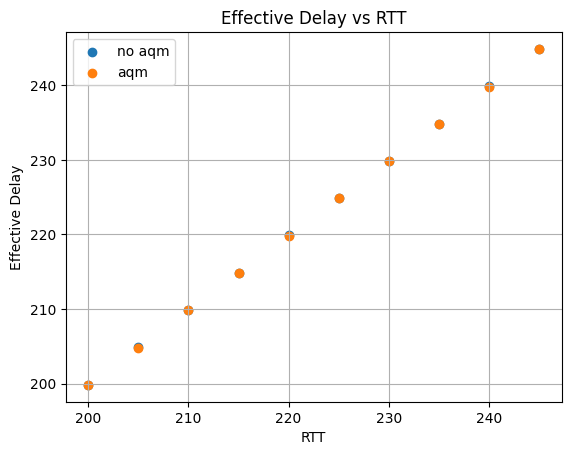

In [6]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Effective Delay(ms)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Effective Delay(ms)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Effective Delay")
plt.title("Effective Delay vs RTT")
plt.grid()
plt.legend()

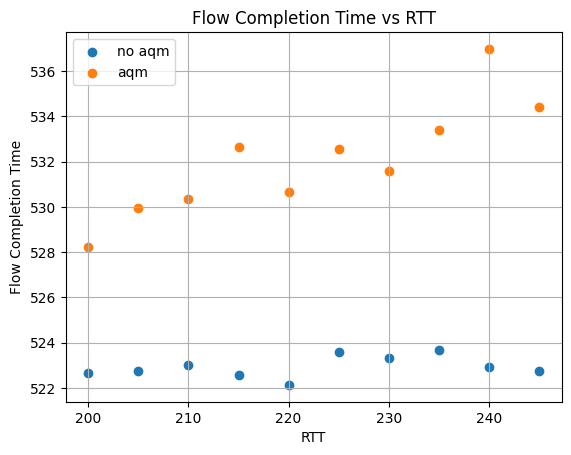

In [7]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Flow Completion Time(s)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Flow Completion Time(s)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Flow Completion Time")
plt.title("Flow Completion Time vs RTT")
plt.grid()
plt.legend()

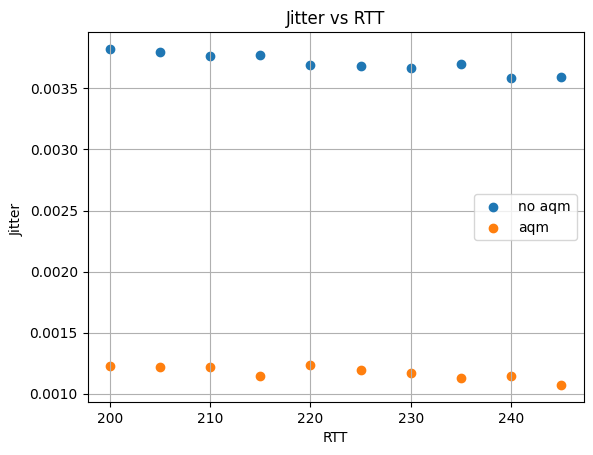

In [8]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Jitter in RTT(ms)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Jitter in RTT(ms)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Jitter ")
plt.title("Jitter vs RTT")
plt.grid()
plt.legend()

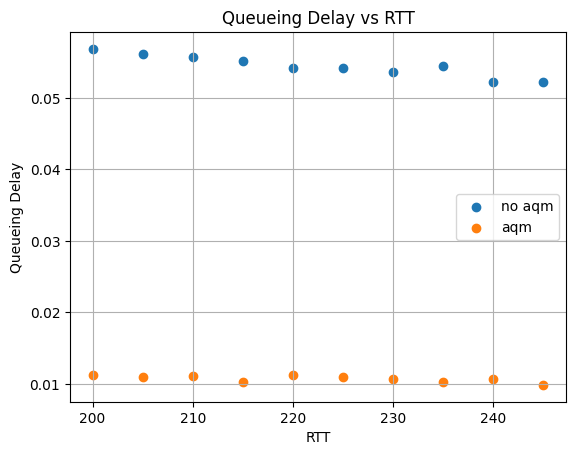

In [9]:
plt.scatter(list(data_naqm_11["RTT"]), list(data_naqm_11["Qeueing Delay(ms)"]), label="no aqm")
plt.scatter(list(data_aqm_11["RTT"]), list(data_aqm_11["Qeueing Delay(ms)"]), label = "aqm")
plt.xlabel("RTT")
plt.ylabel("Queueing Delay")
plt.title("Queueing Delay vs RTT")
plt.grid()
plt.legend()

## Packet Loss percentage

In [35]:
def calc_pkt_loss(flow_data):
    lost_pkts = []
    pkts_sent = []
    for flow in flow_data:
        lost_pkts.append(int(flow['lostPackets']))
        pkts_sent.append(int(flow['txPackets']))
        print(f"Packet Lost: {lost_pkts[-1]} total packets: {pkts_sent[-1]}")
    lost_pkts = np.array(lost_pkts)
    pkts_sent = np.array(pkts_sent)
    
    return (lost_pkts.mean() / pkts_sent.mean()) * 100

In [36]:
# packet loss for aqm
os.chdir("/home/jack/github/mtp/pythonWork/results-3/")
pkt_drop_perc_aqm = []
start_index = 150
for i in range(start_index, start_index+20):
    subprocess.run(f"tar -xvf result-clientServerRouter-{i}.gzip", shell=True, stdout=subprocess.DEVNULL)
    tree = ET.parse(f'result-clientServerRouter-{i}/dumbbell-flowmonitor.xml')
    root = tree.getroot()
    flowstats = root[0]
    attri = []
    for flows in flowstats:
        attri.append(flows.attrib)
    pkt_drop_perc_aqm.append(calc_pkt_loss(attri))

Packet Lost: 280 total packets: 79285
Packet Lost: 164 total packets: 76849
Packet Lost: 0 total packets: 41920
Packet Lost: 224 total packets: 78025
Packet Lost: 0 total packets: 40648
Packet Lost: 0 total packets: 41293
Packet Lost: 243 total packets: 77377
Packet Lost: 230 total packets: 78465
Packet Lost: 0 total packets: 40648
Packet Lost: 206 total packets: 76550
Packet Lost: 0 total packets: 41571
Packet Lost: 167 total packets: 76792
Packet Lost: 0 total packets: 40565
Packet Lost: 200 total packets: 76732
Packet Lost: 297 total packets: 78521
Packet Lost: 0 total packets: 40454
Packet Lost: 0 total packets: 40559
Packet Lost: 0 total packets: 41655
Packet Lost: 218 total packets: 77037
Packet Lost: 0 total packets: 40806
Packet Lost: 221 total packets: 76939
Packet Lost: 0 total packets: 40666
Packet Lost: 242 total packets: 78196
Packet Lost: 201 total packets: 77013
Packet Lost: 0 total packets: 41468
Packet Lost: 0 total packets: 40484
Packet Lost: 237 total packets: 77089


In [37]:
# packet loss for naqm
pkt_drop_perc_naqm = []
start_index = 170
for i in range(start_index, start_index+20):
    subprocess.run(f"tar -xvf result-clientServerRouter-{i}.gzip", shell=True, stdout=subprocess.DEVNULL)
    tree = ET.parse(f'result-clientServerRouter-{i}/dumbbell-flowmonitor.xml')
    root = tree.getroot()
    flowstats = root[0]
    attri = []
    for flows in flowstats:
        attri.append(flows.attrib)
    pkt_drop_perc_naqm.append(calc_pkt_loss(attri))

Packet Lost: 95 total packets: 78304
Packet Lost: 91 total packets: 78638
Packet Lost: 0 total packets: 40938
Packet Lost: 69 total packets: 78108
Packet Lost: 0 total packets: 41115
Packet Lost: 0 total packets: 40907
Packet Lost: 102 total packets: 77258
Packet Lost: 100 total packets: 77798
Packet Lost: 0 total packets: 40189
Packet Lost: 84 total packets: 77865
Packet Lost: 0 total packets: 40746
Packet Lost: 110 total packets: 78557
Packet Lost: 0 total packets: 40808
Packet Lost: 119 total packets: 78746
Packet Lost: 118 total packets: 77592
Packet Lost: 0 total packets: 41083
Packet Lost: 0 total packets: 41046
Packet Lost: 0 total packets: 40621
Packet Lost: 105 total packets: 77521
Packet Lost: 0 total packets: 40602
Packet Lost: 102 total packets: 77995
Packet Lost: 0 total packets: 40795
Packet Lost: 78 total packets: 77943
Packet Lost: 79 total packets: 78119
Packet Lost: 0 total packets: 40798
Packet Lost: 0 total packets: 40620
Packet Lost: 113 total packets: 77769
Packet

In [28]:
rtts = list(data_aqm["RTT"])

Text(0, 0.5, '%')

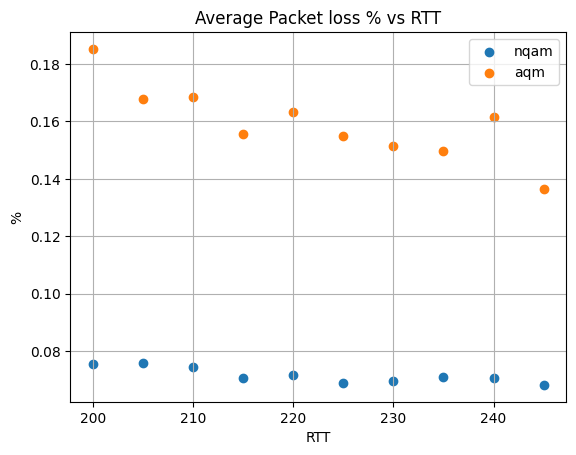

In [38]:
plt.scatter(rtts[-10:], pkt_drop_perc_naqm[-10:], label = "nqam")
plt.scatter(rtts[-10:], pkt_drop_perc_aqm[-10:], label="aqm")
plt.legend()
plt.grid()
plt.title("Average Packet loss % vs RTT")
plt.xlabel("RTT")
plt.ylabel("%")

## Extra

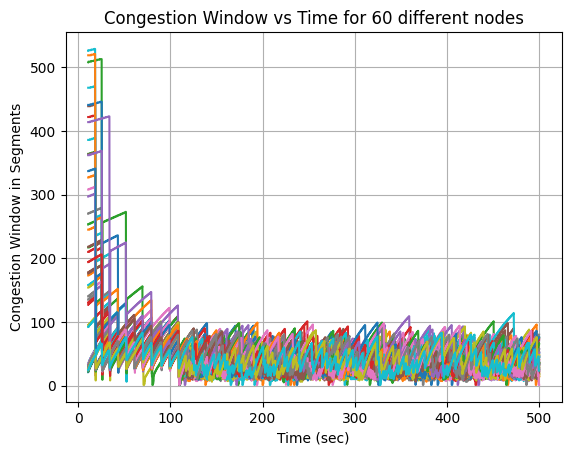

In [32]:

os.chdir('/home/jack/github/mtp/pythonWork/results-2/result-clientServerRouter-72/')

for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f).reshape(-1, 2)
        # print()
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

In [33]:
f = "zeroCrossingTrace-dumbbell.txt"
d = np.genfromtxt(f).reshape(-1, 2)
d.shape

(98, 2)

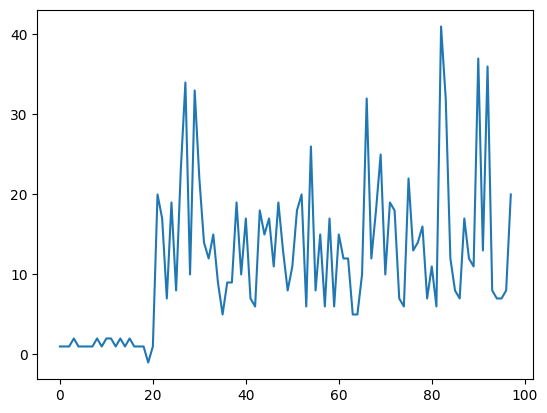

In [34]:
plt.plot(d[:,1])

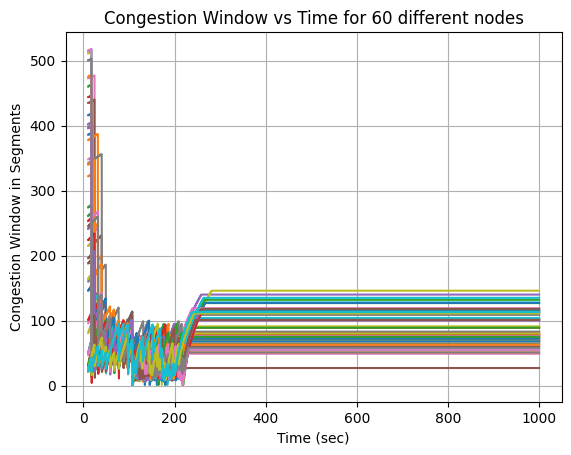

In [21]:

os.chdir('/home/jack/github/mtp/pythonWork/results-3/result-clientServerRouter-120/')

for f in os.listdir():
    if(f.endswith('.cwnd')):
        d = np.genfromtxt(f).reshape(-1, 2)
        # print()
        plt.plot(d[:, 0], d[:, 1], label=f"{f}")
plt.xlabel("Time (sec)")
plt.ylabel("Congestion Window in Segments")
plt.title("Congestion Window vs Time for 60 different nodes")
plt.grid()
# plt.legend()

In [25]:
th = pd.read_csv("throughputs.csv")

In [26]:
th

,Flow number,Source IP,Destination IP,Total Time (s),Data (Mb),Throughput (Mbps)
0,1,10.1.0.1,10.1.60.1,230.444000,378.707733,1.643383
1,2,10.1.1.1,10.1.61.1,225.802889,378.899353,1.678009
2,3,10.1.60.1,10.1.0.1,230.242510,7.763458,0.033719
3,4,10.1.61.1,10.1.1.1,225.600477,7.718689,0.034214
4,5,10.1.2.1,10.1.62.1,241.678530,378.554779,1.566357
...,...,...,...,...,...,...
115,116,10.1.117.1,10.1.57.1,258.496140,7.487854,0.028967
116,117,10.1.58.1,10.1.118.1,252.326830,375.526825,1.488256
117,118,10.1.59.1,10.1.119.1,233.935670,375.858704,1.606675
118,119,10.1.118.1,10.1.58.1,252.097040,7.321411,0.029042


In [27]:
th['Data (Mb)'].mean()

np.float64(192.39691340128581)

In [30]:
f = "zeroCrossingTrace-dumbbell.txt"
d = np.genfromtxt(f).reshape(-1, 2)
d.shape

(198, 2)

In [31]:
d

array([[ 15.4381,   1.    ],
       [ 20.4381,   1.    ],
       [ 25.4381,   2.    ],
       [ 30.4381,   1.    ],
       [ 35.4381,   1.    ],
       [ 40.4381,   1.    ],
       [ 45.4381,   2.    ],
       [ 50.4381,   2.    ],
       [ 55.4381,   1.    ],
       [ 60.4381,   1.    ],
       [ 65.4381,   1.    ],
       [ 70.4381,   1.    ],
       [ 75.4381,   1.    ],
       [ 80.4381,   1.    ],
       [ 85.4381,   1.    ],
       [ 90.4381,   1.    ],
       [ 95.4381,   1.    ],
       [100.438 ,   1.    ],
       [105.438 ,   1.    ],
       [106.763 ,  -1.    ],
       [110.438 ,   1.    ],
       [115.438 ,  10.    ],
       [120.438 ,   8.    ],
       [125.438 ,   6.    ],
       [130.438 ,  10.    ],
       [135.438 ,  19.    ],
       [140.438 ,   9.    ],
       [145.438 ,   7.    ],
       [150.438 ,   6.    ],
       [155.438 ,   5.    ],
       [160.438 ,  11.    ],
       [165.438 ,  12.    ],
       [170.438 ,   8.    ],
       [175.438 ,   8.    ],
       [180.43